In [12]:
# setup
%load_ext rich
import ensure_wd
from rich import print

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [2]:
# libs

import math
from PIL import Image
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as imread
import seaborn as sns
import numpy as np
import pandas as pd

In [26]:
from utils.load_config import get_conf

conf = get_conf(Path('../data/conf.toml'))

DATASET_CONF = conf['histopatological_cancer_detection']

TRAIN_PATH = Path('../data/raw/histopathologic-cancer-detection/train/')
TEST_PATH = Path('../data/raw/histopathologic-cancer-detection/test/')
TRAIN_LABELS = Path('../data/raw/histopathologic-cancer-detection/train_labels.csv')

### Tamanho do dataset  e Distribuição de Classes 

In [31]:
files_train_gen = Path(TRAIN_PATH).glob('*.*')
files_test_gen = Path(TEST_PATH).glob('*.*')

train_list = [file for file in files_train_gen]
test_list = [file for file in files_test_gen]

In [35]:
print(f'test: {len(test_list)}, train: {len(train_list)}')

test: 57458, train: 220025

In [41]:
label_train_df = pd.read_csv(TRAIN_LABELS)

(label_train_df.tail(10), label_train_df.head(10))


(
                                                  id  label
220015  9c0ad1bf43e2fa5e25fac5c8af616c5ae194c187      0
220016  4236e88fb08d16316395f0e71a0a44c4a6fdf794      0
220017  025427fc9743354111cbbc60cab9be094465602b      0
220018  cdf7171a796090072ce521012497c78c9a56cad3      0
220019  1fdacc29221a64e39d5d294d114c9e29da8705ae      0
220020  53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6      0
220021  d4b854fe38b07fe2831ad73892b3cec877689576      1
220022  3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75      0
220023  f129691c13433f66e1e0671ff1fe80944816f5a2      0
220024  a81f84895ddcd522302ddf34be02eb1b3e5af1cb      1,
                                             id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
5  acfe80838488fae3c89bd21ade75be5c34e66be7      0
6  a24ce148f6ff

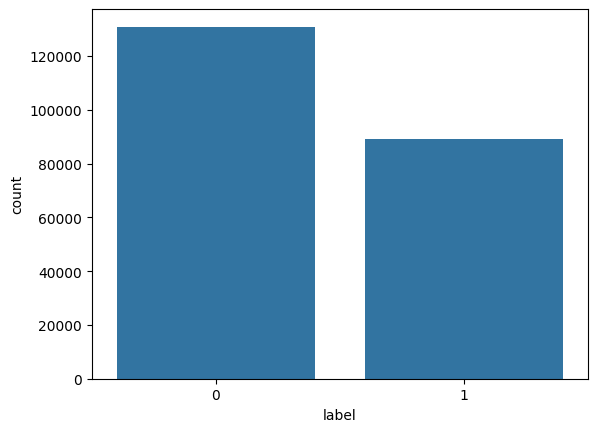

In [44]:
_ = sns.countplot(data=label_train_df, x='label')
plt.show()

In [45]:
label_train_df.value_counts(['label'], normalize=True)


label
0        0.594969
1        0.405031
Name: proportion, dtype: float64

### Check de Sanidade de dados